In [28]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [73]:
def print_vc_bar(vc):
    colors = sns.color_palette('Set3', n_colors=len(vc))
    plt.bar(vc.index, vc.values, color=colors)
    # Настраиваем оси и заголовок
    plt.xticks(rotation=80)
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.title('Распределение значений')
    # Отображаем график
    plt.show()

In [91]:
def print_samples(df, label_col_name, num_examples=1):
    for emotion_name in df[label_col_name].unique():
        print("="*4 + emotion_name + "="*4)
        for t in df[df[label_col_name].apply(lambda x: x==emotion_name)].text.sample(num_examples):
            print(t)

In [78]:

emotion = load_dataset("dair-ai/emotion")
df_emotion_train = pd.DataFrame(emotion['train'])

emotion_dict = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}

df_emotion_train['label'] = df_emotion_train['label'].map(emotion_dict)
vc_emotion = df_emotion_train['label'].value_counts()

No config specified, defaulting to: emotion/split
Found cached dataset emotion (/Users/vlasov/.cache/huggingface/datasets/dair-ai___emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd)
100%|██████████| 3/3 [00:00<00:00, 1108.53it/s]


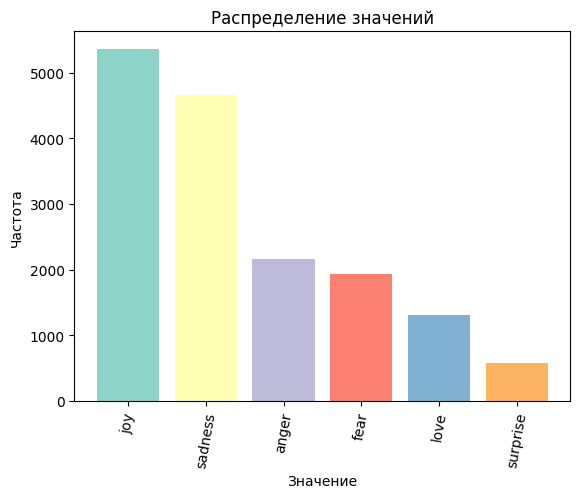

In [79]:
print_vc_bar(vc_emotion)

In [92]:
print_samples(df_emotion_train, label_col_name='label', num_examples=1)

====sadness====
i hadnt been at my parents place for a long time when i went to visit them i had high expectations
====anger====
i just want to show them that i can take care of myself and i feel wronged by staying with them
====love====
i also feel like i have been accepted with open arms hearts and minds thanks for facilitating this welcoming and supportive community marie
====surprise====
i always want nemo by my side and sleeping without her now feels weird even though it doesnt happen often that i get to
====fear====
i am not feeling fearful
====joy====
i mean i know how it feels that a person is valued by the family if s he gives money or food to the table


In [65]:
empathetic = load_dataset("bdotloh/empathetic-dialogues-contexts")
df_empathetic_train = pd.DataFrame(empathetic['train'])
vc_empathetic = df_empathetic_train['emotion'].value_counts()

Found cached dataset csv (/Users/vlasov/.cache/huggingface/datasets/bdotloh___csv/bdotloh--empathetic-dialogues-contexts-41c3ddd9f24ef7f4/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)
100%|██████████| 3/3 [00:00<00:00, 104.86it/s]


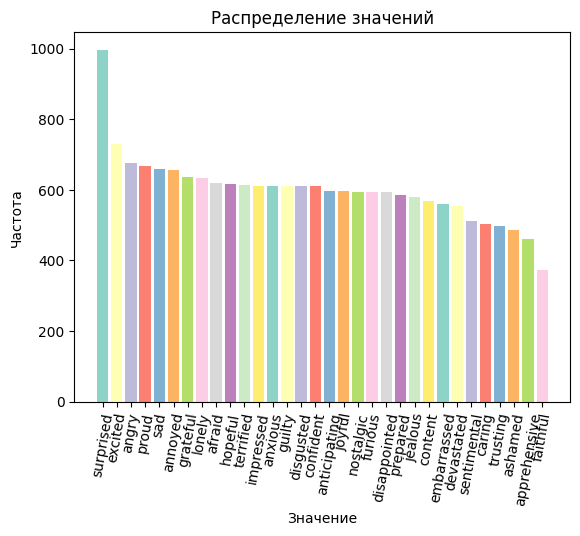

In [75]:
print_vc_bar(vc_empathetic)

In [43]:
cedr = load_dataset('cedr')
df_cedr_train = pd.DataFrame(cedr['train'])
cedr_id2label = {0: "joy", 1: "sadness", 2: "surprise", 3: "fear", 4: "anger"}

df_cedr_train['labels'] = df_cedr_train['labels'].apply(lambda x: [cedr_id2label[label] for label in x])
vc_cedr = df_cedr_train.labels.apply(str).value_counts()

No config specified, defaulting to: cedr/main
Found cached dataset cedr (/Users/vlasov/.cache/huggingface/datasets/cedr/main/0.1.1/117570489cbabbdf8de619bd31918a1cd680a7f286b89d04af340d0691dc2d66)
100%|██████████| 2/2 [00:00<00:00, 75.96it/s]


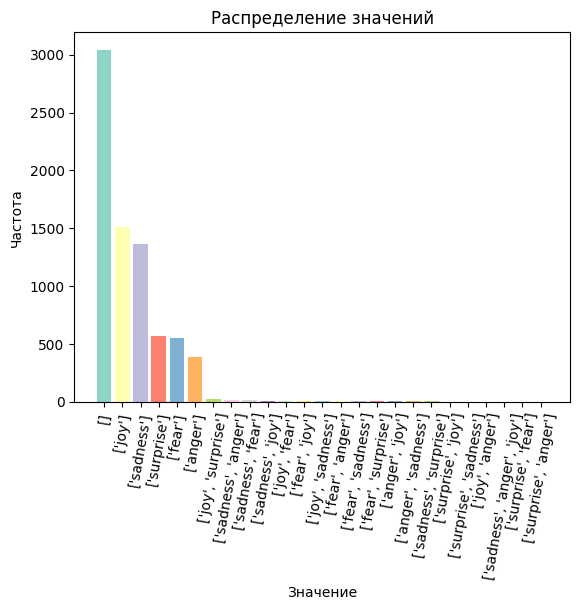

In [76]:
print_vc_bar(vc_cedr)

## Translate

In [16]:
import requests
import json

In [18]:
def write_to_file(text, file_name):
    try:
        with open(file_name, "a") as file:
            file.write(text + "\n")  
    except FileNotFoundError:
        with open(file_name, "w") as file:
            file.write(text + "\n")


def translate_strings(IAM_TOKEN, 
                      folder_id, 
                      texts, 
                      step_translate=1,
                      file_name="translated_text.txt"):

    target_language = 'ru'
    sourceLanguageCode = 'en'

    body = {
        "targetLanguageCode": target_language,
        "sourceLanguageCode": sourceLanguageCode,
        "folderId": folder_id,
    }

    headers = {
        "Content-Type": "application/json",
        "Authorization": "Bearer {0}".format(IAM_TOKEN)
    }
    
    for i in range(0, len(texts) - step_translate + 1, step_translate):
        step_texts = texts[i : i + step_translate]
        body["texts"] = step_texts
        
        response = requests.post(
            'https://translate.api.cloud.yandex.net/translate/v2/translate',
            json = body,
            headers = headers
        )
        
        json_object = json.loads(response.text)
        step_texts_translated = [s['text'] for s in json_object['translations']]
        
        for text in step_texts_translated:
            write_to_file(text, file_name)

### translate and prepare emotionsGo from OneAI

In [30]:
path_to_data = Path('/Users/vlasov/Desktop/current_projects/my_first_data_project/mfdp-sentiment/data/raw/emotions')
IAM_TOKEN = "t1.9euelZqVkpmcjZvIj8qJzJ2UjpCQiu3rnpWaz4mSmJCVk8-XzpiJmc2Mmo3l8_dgAjdc-e8SD3R6_t3z9yAxNFz57xIPdHr-.-ZvYsFwENZcfiE4qTJ19Z5Lq55NCngBT95ZdeiFuE1-9cs4BzTNaiLtwPMoG9KxYR1lVSD6jMqTvCnNgUET-BQ"
folder_id = "b1garebrjtd5ndtm2etn"

In [ ]:
emotions_oneai = pd.read_csv(path_to_data / 'EmotionsGo_OneAI.csv')
texts = emotions_oneai['text'].to_list()

In [34]:
translate_strings(IAM_TOKEN, folder_id, texts, step_translate=1, file_name=path_to_data / 'emotionsGo_ru.txt')

In [4]:
with open('emotionsGo_ru.txt') as f:
    lines = f.readlines()
    
    assert len(texts) == len(lines)
    
    emotionsGo_labels = [[label] for label in emotions_oneai['labels'].to_list()]
    lines = [line.strip() for line in lines]

    EmotionsGo_RU = pd.DataFrame({'text': lines,
                  'labels': emotionsGo_labels,
                  'source': ['EmotionsGo_oneAI'] * len(lines)})
    
    path = '/Users/vlasov/Desktop/current_projects/my_first_data_project/mfdp-sentiment/data/raw/emotions/EmotionsGo_RU.csv'
    EmotionsGo_RU.to_csv(path, index=False)

### translate and prepare dair_ai/emotions

In [6]:
emotion = load_dataset("dair-ai/emotion")


No config specified, defaulting to: emotion/split
Found cached dataset emotion (/Users/vlasov/.cache/huggingface/datasets/dair-ai___emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd)
100%|██████████| 3/3 [00:00<00:00, 86.93it/s]


In [7]:
emotion

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [8]:
df_emotion_train = pd.DataFrame(emotion['train'])
df_emotion_val = pd.DataFrame(emotion['validation'])
df_emotion_test = pd.DataFrame(emotion['test'])

emotion_dict = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}

concatenated_df = pd.concat([df_emotion_train, df_emotion_val, df_emotion_test])
concatenated_df = concatenated_df.reset_index(drop=True)
concatenated_df['label'] = concatenated_df['label'].map(emotion_dict)
texts = concatenated_df['text'].to_list()

In [25]:
translate_strings(IAM_TOKEN, folder_id, texts[10270:], step_translate=10, file_name='dairai_emotion.txt')

In [27]:
with open('dairai_emotion.txt') as f:
    lines = f.readlines()
    
    assert len(texts) == len(lines)
    
    emotion_labels = [[label] for label in concatenated_df['label'].to_list()]
    lines = [line.strip() for line in lines]

    dairai_emotion = pd.DataFrame({'text': lines,
                  'labels': emotion_labels,
                  'source': ['dairai_emotion'] * len(lines)})
    
    path = '/Users/vlasov/Desktop/current_projects/my_first_data_project/mfdp-sentiment/data/raw/emotions/dairai_emotion.csv'
    dairai_emotion.to_csv(path, index=False)